# LOAN STATUS PREDICTION

# PROBLEM
A company wants to automate the loan eligibility process (real time) based on the coustomer details provided while filling online application form.these details gender,marital status,education,number of dependents,income,loan amount,credit history and others.to automate this process,they have given a problem to identify the coustomer segments,those are eligible for loan amount so that can specifically target these coustomers .

# Objectives of Notebook 
 This notebook aims to:

Analyze customer data provided in data set (EDA)
Build various ML models that can predict loan approval


# The machine learning models used in this project are:

Logistic Regression
K-Nearest Neighbour (KNN)
Support Vector Machine (SVM)
Naive Bayes

# 1. Data Set Description .

There are 13 variables in this data set:

8 categorical variables,
4 continuous variables, and
1 variable to accommodate the loan ID.


# 2. Importing Libraries 
Importing libraries that will be used in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



# 3.Reading Data Set 
 After importing libraries, we will also import the dataset that will be used.

In [2]:
#load dataset into dataframe df
df = pd.read_csv("C:\\Users\\Mohamed Ashfak\\Downloads\\train_u6lujuX_CVtuZ9i (1).csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# to check the shape of the dataset as rows and columns
df.shape

(614, 13)

* As can be seen, the 13 columns are readable. It also can be seen that there are 614 observations in the data set.

In [5]:
# for checking the types of the varibles
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#check for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* So gender, married, dependents, self-employed, loan amount, loan amount term and credit history have null values
So first lets have a look at the variables and their distribution,Then we have to fill missing values.

# 4. Data Exploration  and Cleaning
This section will perform data exploration and cleaning of the imported raw data set.first  we go through categorical variables and then Numerical Variables.

# 4.1 Categorical Variable .
 The first type of variable that I will explore is categorical variable.

we have the following categorical variables in our data set.

1.Loan_ID

2.Gender

3.Married

4.Dependents

5.Self_Employed

6.Property_Area

7.Education

8.Credit_History

9.Loan_Status

# 1. Loan_ID


In [7]:
df.Loan_ID.value_counts(dropna=False)


LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

* It can be seen that there are 614 unique ID in the dataset,no null vales in Loan_ID.

# 2. Gender

In [8]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

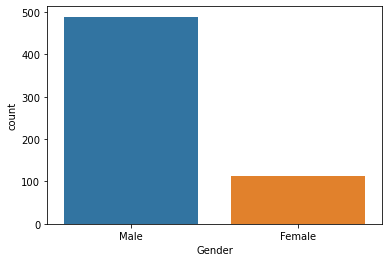

In [9]:
sns.countplot(x="Gender", data=df )
plt.show()

In [10]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


As the majority of the applicants are male we would simply fill the null values with Male gender.

In [11]:
#filling the missing values.
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# 3. MARRIED

In [12]:
df['Married'].value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

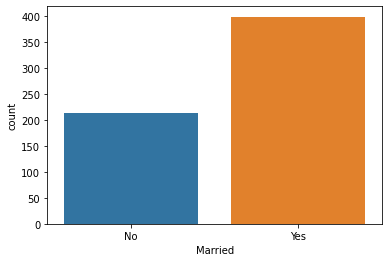

In [13]:
sns.countplot(x="Married", data=df)
plt.show()

In [14]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))



Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


In [15]:
#filling missing values.
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

# 4..DEPENDENTS

In [16]:
df['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [17]:
#replace object to integer.
df=df.replace(to_replace='3+',value=4)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

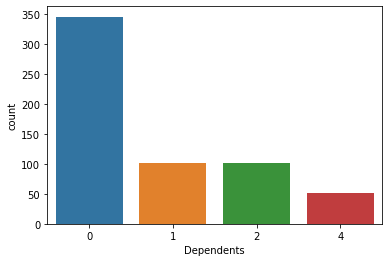

In [18]:
sns.countplot(x='Dependents', data=df)

In [19]:
df ['Dependents'] = df ['Dependents'].fillna(df['Dependents'].mode()[0])

# 5. SELF-EMPLOYED

In [20]:
df['Self_Employed'].value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

C:\Users\Mohamed Ashfak\OneDrive - NTT\Documents\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

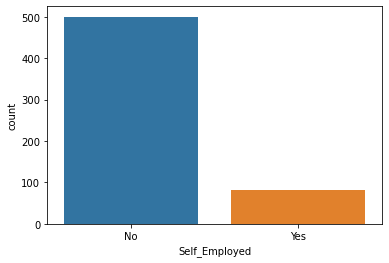

In [21]:
sns.countplot(df['Self_Employed'])

So nearly 85% of the applicants are not employed. So filling the null values as not employed

In [22]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# 6.PROPERTY AREA

In [23]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

C:\Users\Mohamed Ashfak\OneDrive - NTT\Documents\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

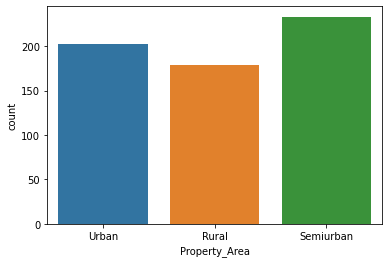

In [24]:
sns.countplot(df['Property_Area'])

In [25]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


*This column has a balanced distribution between Urban, Rural, and Semiurban property area.
It also can be seen there is no missing value.

# 7.EDUCATION

In [26]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

C:\Users\Mohamed Ashfak\OneDrive - NTT\Documents\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

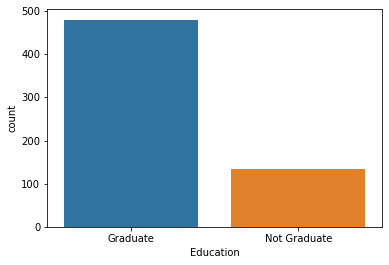

In [27]:
sns.countplot(df['Education'])

# 8.CREDIT HISTORY

In [28]:
df['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

C:\Users\Mohamed Ashfak\OneDrive - NTT\Documents\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

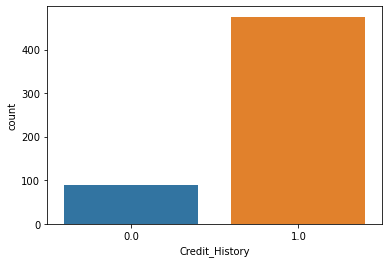

In [29]:
sns.countplot(df['Credit_History'])

In [30]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# 9.LOAN STATUS.

In [31]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

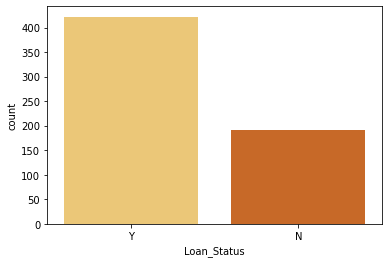

In [32]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [33]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


*The number of approved loans is higher compared to rejected loans .
It also can be seen, there is no missing values in this column.

# 4.2 NUMERICAL VARIABLES ANALYSIS

In [34]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


# 1. ApplicantIncome

In [35]:
df.ApplicantIncome.value_counts(dropna=False)

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

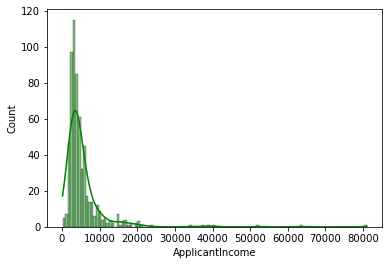

In [36]:
sns.histplot(data=df, x="ApplicantIncome", kde=True, color='green')

# 2.CoapplicantIncome

In [37]:
df.CoapplicantIncome.value_counts(dropna=False)

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

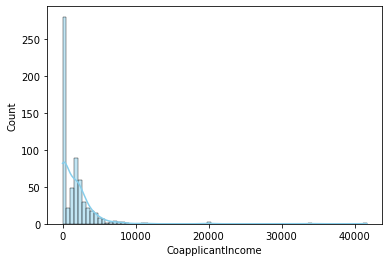

In [38]:
sns.histplot(data=df, x="CoapplicantIncome", kde=True, color='skyblue')

# 3. LOAN AMOUNT

In [39]:
df.LoanAmount.value_counts(dropna=False)

NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 204, dtype: int64

In [40]:
df.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [41]:
df ['LoanAmount'] = df ['LoanAmount'].fillna(df['LoanAmount'].mean())

C:\Users\Mohamed Ashfak\OneDrive - NTT\Documents\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mohamed Ashfak\OneDrive - NTT\Documents\New folder\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

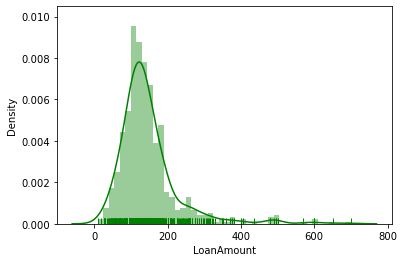

In [42]:
sns.distplot(df['LoanAmount'], rug = True, color = 'g')

In [43]:
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

C:\Users\Mohamed Ashfak\OneDrive - NTT\Documents\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

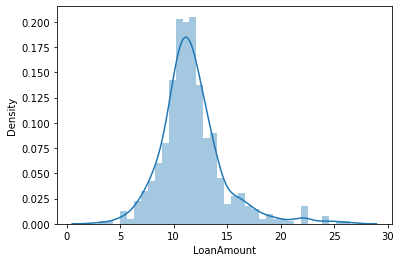

In [44]:
sns.distplot(df['LoanAmount'])

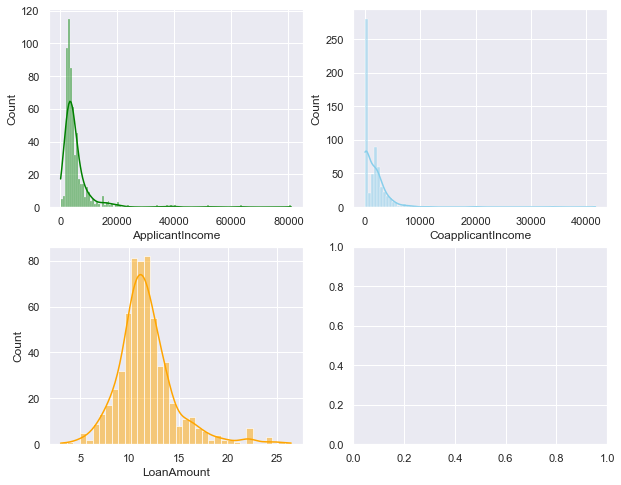

In [45]:
# Histogram Distribution .
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [46]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

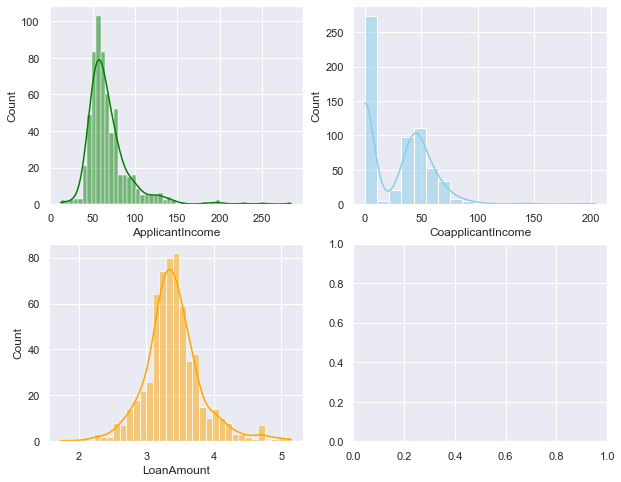

In [47]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

# 6 LOAN AMOUNT TERM

In [48]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [49]:
df['Loan_Amount_Term'].value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

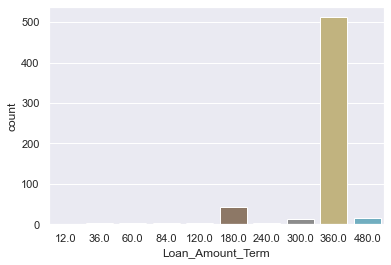

In [50]:
sns.countplot(x="Loan_Amount_Term", data=df)
plt.show()

*As can be seen from the results, the 360 days loan duration is the most popular compared to others.

In [51]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [52]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 4.3 Other Exploration 


 This section will show additional exploration from each variables. The additional exploration are:

Bivariate analysis (categorical w/ categorical, categroical w/ numerical, and numerical w/ numerical)
Heatmap

# 1. Heatmap 

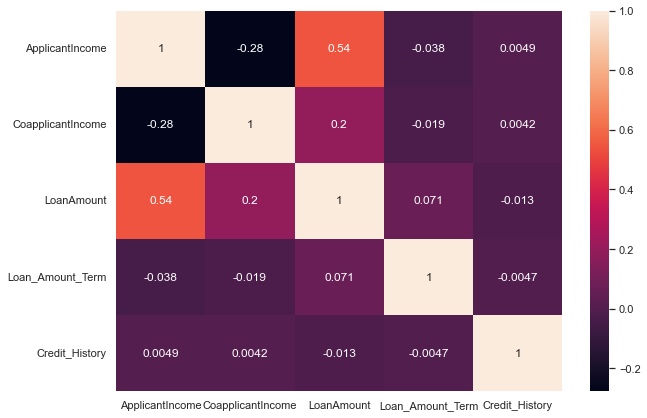

In [53]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, );

*There is positive correlation between Loan Amount and Applicant Income

# 2.Categorical  - Categorical 

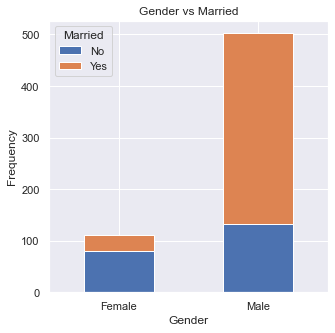

In [54]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5))
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most male applicants are already married compared to female applicants. 
Also, the number of not married male applicants are higher compare to female applicants that had not married.

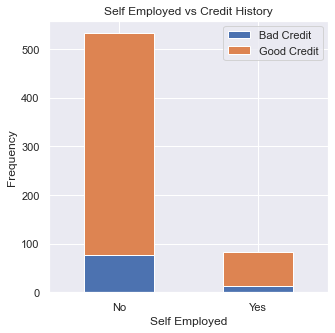

In [55]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5))
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

 *Most not self employed applicants have good credit compared to self employed applicants.*

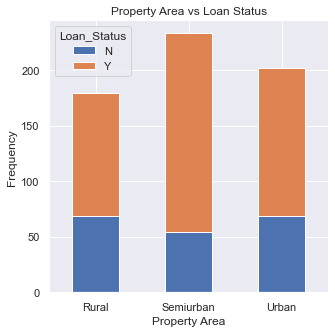

In [56]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5))
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most of loan that got approved has property in Semiurban compared to Urban and Rural.

# 3. Categorical - Numerical 


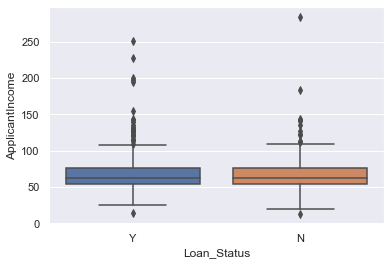

In [57]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df);

 It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

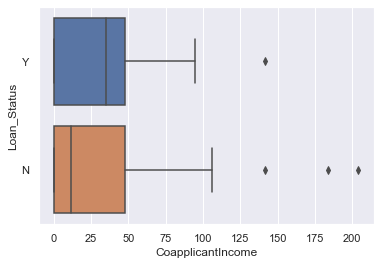

In [58]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df);

 It's clear that Co Applicant Income has a higher number of outliers, and the distribution is also positively skewed.

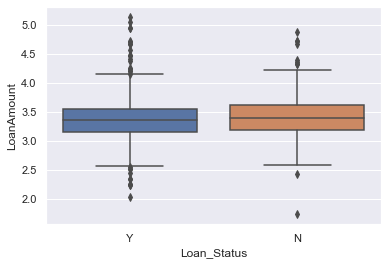

In [59]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df);

# 4. Numerical  - Numerical 

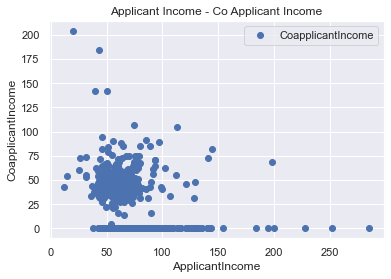

In [60]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()

There is negative correlation between Applicant income and Co Applicant Income.

# 5. Data Preprocessing 

# 5.1 Drop Unecessary Variables 

In [61]:
# Unecessary variables will be dropped in this section.

df = df.drop(['Loan_ID'], axis = 1)

# 5.2 Data Imputation 


* Imputation is a technique for substituting an estimated value for missing values in a dataset. In this section, the imputation will be performed for variables that have missing values.we al ready performed these following imputations for categorical and numerical variables.

# Categorical Variables imputation
* In this section, the imputation for categorical variables will be performed using mode.

        df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

        df['Married'].fillna(df['Married'].mode()[0],inplace=True)

        df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

        df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

        df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
       
        df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [62]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)



# Numerical Variables imputation 

#in this section numerical variables are imputed using mean.only LoanAmount varable have null values and ApplicantIncome And CoapplicantIncome variables do not pocess null values.

        df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


In [63]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

# 5.3 Remove Outliers & Infinite values
Since there are outliers, the outliers will be removed.

In [64]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_5560/2206497519.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


# 5.4 Skewed Distribution Treatment 


 In previous section, it already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed.
 I will use square root transformation to normalized the distribution.we already performed this operations.

# Square Root Transformation

#df.ApplicantIncome = np.sqrt(df.ApplicantIncome)

#df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)

#df.LoanAmount = np.sqrt(df.LoanAmount)

In [65]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

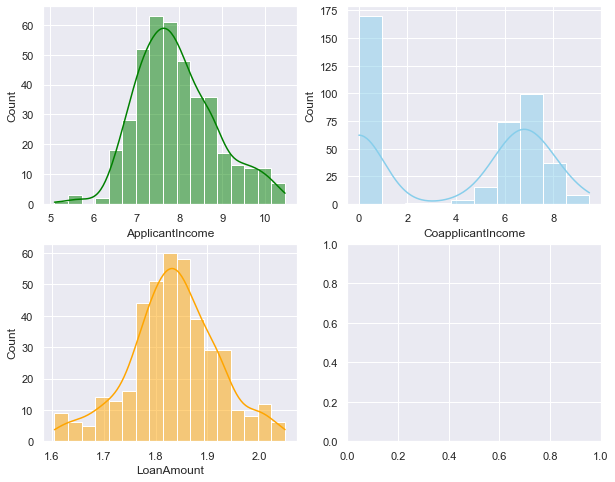

In [66]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');


# 5.5 Features Separating 

In [67]:
# Dependent features (Loan_Status) will be seperated from independent features.

X= df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]
df.Loan_Status.value_counts()


Y    330
N     79
Name: Loan_Status, dtype: int64

In [68]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,8.745213,0.000000,1.865079,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,8.227871,6.231611,1.834008,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,7.400828,0.000000,1.688274,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,7.129041,6.968446,1.819272,360.0,1.0,Urban
4,Male,No,0,Graduate,No,8.801117,0.000000,1.856318,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
607,Male,Yes,2,Not Graduate,No,7.946238,6.128889,1.881427,360.0,1.0,Rural
608,Male,Yes,0,Graduate,No,7.539939,6.645209,1.795469,360.0,1.0,Rural
609,Female,No,0,Graduate,No,7.338368,0.000000,1.703756,360.0,1.0,Rural
611,Male,Yes,1,Graduate,No,9.478624,3.935979,1.997055,360.0,1.0,Urban


In [69]:
# convert categorical columns to numerical values
X.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [70]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,8.745213,0.000000,1.865079,360.0,1.0,2
1,1,1,1,1,0,8.227871,6.231611,1.834008,360.0,1.0,0
2,1,1,0,1,1,7.400828,0.000000,1.688274,360.0,1.0,2
3,1,1,0,0,0,7.129041,6.968446,1.819272,360.0,1.0,2
4,1,0,0,1,0,8.801117,0.000000,1.856318,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,2,0,0,7.946238,6.128889,1.881427,360.0,1.0,0
608,1,1,0,1,0,7.539939,6.645209,1.795469,360.0,1.0,0
609,0,0,0,1,0,7.338368,0.000000,1.703756,360.0,1.0,0
611,1,1,1,1,0,9.478624,3.935979,1.997055,360.0,1.0,2


In [71]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [72]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [73]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [74]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_4,Dependents_0,Dependents_1,Dependents_2,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,8.745213,0.000000,1.865079,360.0,1.0,1,0,0,1,0,0,1,0,0,0,1,1
1,8.227871,6.231611,1.834008,360.0,1.0,1,1,0,0,1,0,1,0,1,0,0,0
2,7.400828,0.000000,1.688274,360.0,1.0,1,1,0,1,0,0,1,1,0,0,1,1
3,7.129041,6.968446,1.819272,360.0,1.0,1,1,0,1,0,0,0,0,0,0,1,1
4,8.801117,0.000000,1.856318,360.0,1.0,1,0,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,7.946238,6.128889,1.881427,360.0,1.0,1,1,0,0,0,1,0,0,1,0,0,1
608,7.539939,6.645209,1.795469,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,1
609,7.338368,0.000000,1.703756,360.0,1.0,0,0,0,1,0,0,1,0,1,0,0,1
611,9.478624,3.935979,1.997055,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1


# 5.6 SMOTE Technique 
 In previous exploration, it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,

In [75]:

X, y = SMOTE().fit_resample(X, y)

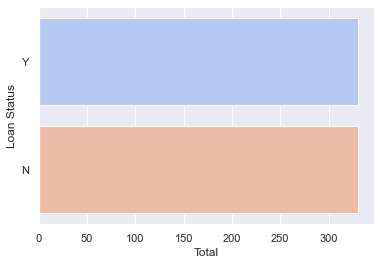

In [76]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

# 5.6 Data Normalization 
In this section, data normalization will be performed to normalize the range of independent variables or features of data.

In [77]:
X = MinMaxScaler().fit_transform(X)


# 5.7Splitting Data Set 
The data set will be split into 80% train and 20% test.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)



# 6. Models 🛠
6.1 Logistic Regression¶

In [89]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           N       0.69      0.50      0.58        72
           Y       0.55      0.73      0.63        60

    accuracy                           0.61       132
   macro avg       0.62      0.62      0.60       132
weighted avg       0.63      0.61      0.60       132

[[36 36]
 [16 44]]
LR accuracy: 60.61%


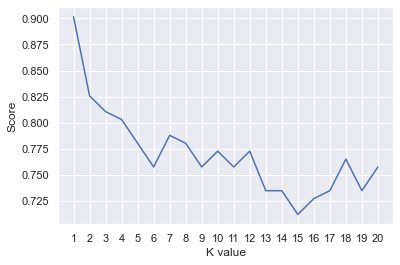

KNN best accuracy: 90.15%


In [90]:
#K-Nearest Neighbour (KNN)
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [81]:
#6.3 Support Vector Machine (SVM)
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           N       0.83      0.53      0.64        72
           Y       0.60      0.87      0.71        60

    accuracy                           0.68       132
   macro avg       0.72      0.70      0.68       132
weighted avg       0.73      0.68      0.68       132

[[38 34]
 [ 8 52]]
SVC accuracy: 68.18%


In [82]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           N       0.68      0.61      0.64        72
           Y       0.58      0.65      0.61        60

    accuracy                           0.63       132
   macro avg       0.63      0.63      0.63       132
weighted avg       0.63      0.63      0.63       132

[[44 28]
 [21 39]]
Gaussian Naive Bayes accuracy: 62.88%


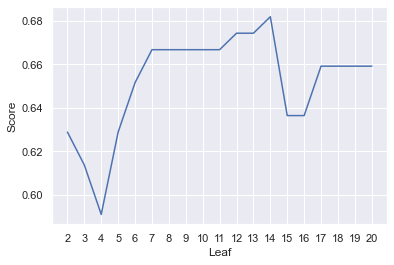

Decision Tree Accuracy: 68.18%


In [83]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

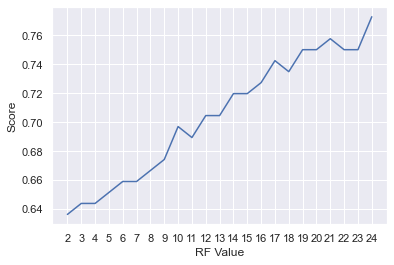

Random Forest Accuracy:  77.27%


In [84]:
#6.6 Random Forest
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))


In [91]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',  'SVM',
                                  'Gaussian NB', 'Decision Tree','Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc2*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
1,K Neighbors,90.151515
5,Random Forest,77.272727
2,SVM,68.181818
4,Decision Tree,68.181818
3,Gaussian NB,62.878788
0,Logistic Regression,60.606061
